In [17]:
import h5py as h5
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [30]:
path = '/home/sadat/Documents/DSE/Data/yogurt.h5'

##Analyze yogurt.h5 structure

In [31]:
data = h5.File(path)

def printname(name):   
    print(name)

data.visit(printname)

drug
drug/_i_table
drug/_i_table/index
drug/_i_table/index/abounds
drug/_i_table/index/bounds
drug/_i_table/index/indices
drug/_i_table/index/indicesLR
drug/_i_table/index/mbounds
drug/_i_table/index/mranges
drug/_i_table/index/ranges
drug/_i_table/index/sorted
drug/_i_table/index/sortedLR
drug/_i_table/index/zbounds
drug/table
groc
groc/_i_table
groc/_i_table/index
groc/_i_table/index/abounds
groc/_i_table/index/bounds
groc/_i_table/index/indices
groc/_i_table/index/indicesLR
groc/_i_table/index/mbounds
groc/_i_table/index/mranges
groc/_i_table/index/ranges
groc/_i_table/index/sorted
groc/_i_table/index/sortedLR
groc/_i_table/index/zbounds
groc/table
panel
panel/_i_table
panel/_i_table/index
panel/_i_table/index/abounds
panel/_i_table/index/bounds
panel/_i_table/index/indices
panel/_i_table/index/indicesLR
panel/_i_table/index/mbounds
panel/_i_table/index/mranges
panel/_i_table/index/ranges
panel/_i_table/index/sorted
panel/_i_table/index/sortedLR
panel/_i_table/index/zbounds
panel/ta

In [32]:
data.close()

##Panel data

In [4]:
df = pd.read_hdf(path, key='panel')

In [5]:
df.head()

,COLUPC,DOLLARS,IRI_KEY,MINUTE,OUTLET,PANID,UNITS,WEEK,file
0,17047000300,0.99,1097117,5068.0,DK,3138826,1.0,1514,yogurt_PANEL_DK_1479_1530.DAT
1,17047000302,0.89,1097117,2224.0,DK,3138826,1.0,1489,yogurt_PANEL_DK_1479_1530.DAT
2,17047000650,0.89,1097117,6551.0,DK,3138826,1.0,1488,yogurt_PANEL_DK_1479_1530.DAT
3,17047000650,2.97,1097117,6177.0,DK,3182048,3.0,1526,yogurt_PANEL_DK_1479_1530.DAT
4,17047001372,1.49,1097117,973.0,DK,3184911,1.0,1495,yogurt_PANEL_DK_1479_1530.DAT


####Missing data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609107 entries, 0 to 15
Data columns (total 9 columns):
COLUPC     1609107 non-null int64
DOLLARS    1609107 non-null float64
IRI_KEY    1609107 non-null int64
MINUTE     520189 non-null float64
OUTLET     1609107 non-null object
PANID      1609107 non-null int64
UNITS      1609107 non-null float64
WEEK       1609107 non-null int64
file       1609107 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 122.8+ MB


MINUTE has missing data. Let's look at the values:

In [9]:
df[df['MINUTE'].isnull()].head()

,COLUPC,DOLLARS,IRI_KEY,MINUTE,OUTLET,PANID,UNITS,WEEK,file
0,13663200108,0.89,651444,NaN,DR,3307876,1.0,1119,yogurt_PANEL_DR_1114_1165.dat
1,13663200108,0.89,651444,NaN,DR,3333500,1.0,1148,yogurt_PANEL_DR_1114_1165.dat
2,13663200701,1.19,651444,NaN,DR,3109355,1.0,1150,yogurt_PANEL_DR_1114_1165.dat
3,13663200701,1.19,651444,NaN,DR,3807982,1.0,1151,yogurt_PANEL_DR_1114_1165.dat
4,13663200702,1.19,651444,NaN,DR,3805705,1.0,1151,yogurt_PANEL_DR_1114_1165.dat


In [ ]:
It seems that the

Percentage of MINUTE NaN from each OUTLET:

In [7]:
df[df['MINUTE'].isnull()].groupby('OUTLET').count()['UNITS']/1609107*100

OUTLET
DR     0.012554
GR    67.329395
KK     0.049841
MA     0.280404
Name: UNITS, dtype: float64

It seems GR (Groceries) have 67% of its MINUTE data missing. The other outlets have less than 1% missing.

####Sales by time (MINUTE and WEEK)  .. HELP NEEDED!

- Minute needs to be conveted to 24 hours and day of the week.
- Week needs to be converted to start and end dates (to account for holidays).

- Refer to section 3.9 here: https://github.com/mGalarnyk/Machine_Learning_Froyo/blob/master/IRI.pdf

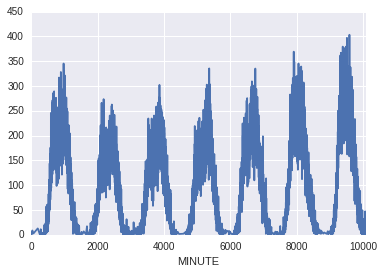

In [28]:
df.dropna().groupby('MINUTE')['DOLLARS'].sum().plot();

Based on the spikes, we can tell that yogurt sales are higher during certain times of the day.

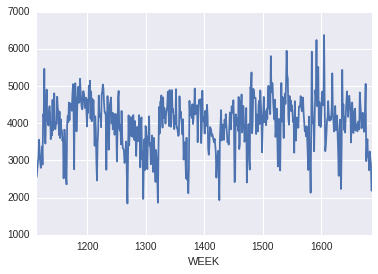

In [37]:
df.groupby('WEEK')['DOLLARS'].sum().plot();

We can see spikes in weeks (indicating some pattern). Unless we convert them to times of the year, we cant decipher the spikes.

####Sales by OUTLET

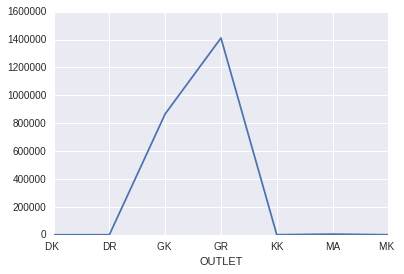

In [36]:
df.groupby('OUTLET')['DOLLARS'].sum().plot();

GK and GR have the greatest sales.